# Current population of Germany by Nationality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime

# Options and Settings

In [2]:
%matplotlib inline
sns.set_theme(style='dark')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 14
path = os.getcwd()                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Population Germany, reference date, nationality.csv')

df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df.head()

,ReferenceDate,Germans,Foreigners,Total
0,1970-12-31,58263259,2737905,61001164
1,1971-12-31,58314646,3187857,61502503
2,1972-12-31,58255300,3554078,61809378
3,1973-12-31,58110017,3991352,62101369
4,1974-12-31,57940513,4050962,61991475


In [5]:
df.shape                  # df dimensions

(51, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ReferenceDate  51 non-null     object
 1   Germans        51 non-null     int64 
 2   Foreigners     51 non-null     int64 
 3   Total          51 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [7]:
df['Year'] = pd.DatetimeIndex(df['ReferenceDate']).year                        # extract year
df['Month'] = pd.DatetimeIndex(df['ReferenceDate']).month                      # extract month
df['Day'] = pd.DatetimeIndex(df['ReferenceDate']).day                          # extract day

df.head(10)

,ReferenceDate,Germans,Foreigners,Total,Year,Month,Day
0,1970-12-31,58263259,2737905,61001164,1970,12,31
1,1971-12-31,58314646,3187857,61502503,1971,12,31
2,1972-12-31,58255300,3554078,61809378,1972,12,31
3,1973-12-31,58110017,3991352,62101369,1973,12,31
4,1974-12-31,57940513,4050962,61991475,1974,12,31
5,1975-12-31,57744140,3900484,61644624,1975,12,31
6,1976-12-31,57589814,3852182,61441996,1976,12,31
7,1977-12-31,57460519,3892226,61352745,1977,12,31
8,1978-12-31,57315844,4005819,61321663,1978,12,31
9,1979-12-31,57188694,4250648,61439342,1979,12,31


In [8]:
germans = df['Germans']
foreign = df['Foreigners']
total = df['Total']

# function to calculate the population proportions 
def ratio_calc(df, x, y):                     
    return x / y

df['GermansPct'] = ratio_calc(df=df, x=germans, y=total)
df['ForeignersPct'] = ratio_calc(df=df, x=foreign, y=total)

df.head(10)

,ReferenceDate,Germans,Foreigners,Total,Year,Month,Day,GermansPct,ForeignersPct
0,1970-12-31,58263259,2737905,61001164,1970,12,31,0.955117,0.044883
1,1971-12-31,58314646,3187857,61502503,1971,12,31,0.948167,0.051833
2,1972-12-31,58255300,3554078,61809378,1972,12,31,0.942499,0.057501
3,1973-12-31,58110017,3991352,62101369,1973,12,31,0.935728,0.064272
4,1974-12-31,57940513,4050962,61991475,1974,12,31,0.934653,0.065347
5,1975-12-31,57744140,3900484,61644624,1975,12,31,0.936726,0.063274
6,1976-12-31,57589814,3852182,61441996,1976,12,31,0.937304,0.062696
7,1977-12-31,57460519,3892226,61352745,1977,12,31,0.936560,0.063440
8,1978-12-31,57315844,4005819,61321663,1978,12,31,0.934675,0.065325
9,1979-12-31,57188694,4250648,61439342,1979,12,31,0.930816,0.069184


In [9]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Year Grouping

In [10]:
df1 = df.iloc[:16]                                    # year 1970 - 1985
df2 = df.iloc[16:31]                                  # year 1986 - 2000
df3 = df.iloc[31:]                                    # year 2000 upwards

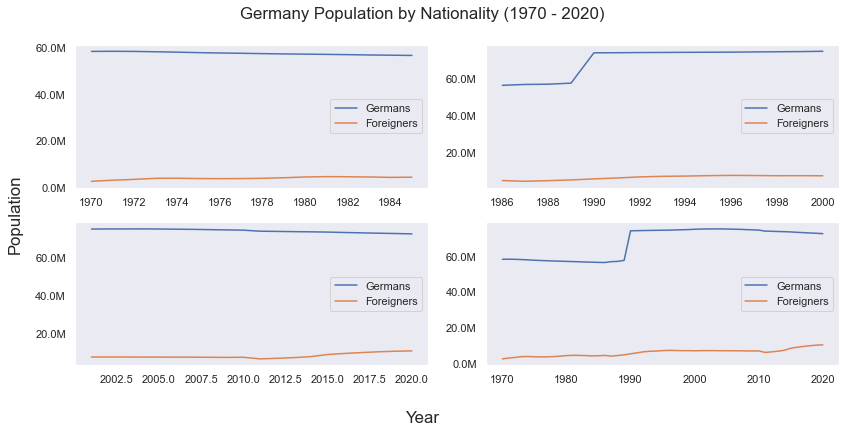

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))
plt.suptitle('Germany Population by Nationality (1970 - 2020)')
fig.supxlabel('Year')
fig.supylabel('Population')

ax1.plot(df1['Year'], df1['Germans'], label='Germans')
ax1.plot(df1['Year'], df1['Foreigners'], label='Foreigners')
ax1.yaxis.set_major_formatter(formatter)
ax1.legend(loc='center right')

ax2.plot(df2['Year'], df2['Germans'], label='Germans')
ax2.plot(df2['Year'], df2['Foreigners'], label='Foreigners')
ax2.yaxis.set_major_formatter(formatter)
ax2.legend(loc='center right')

ax3.plot(df3['Year'], df3['Germans'], label='Germans')
ax3.plot(df3['Year'], df3['Foreigners'], label='Foreigners')
ax3.yaxis.set_major_formatter(formatter)
ax3.legend(loc='center right')

ax4.plot(df['Year'], df['Germans'], label='Germans')
ax4.plot(df['Year'], df['Foreigners'], label='Foreigners')
ax4.yaxis.set_major_formatter(formatter)
ax4.legend(loc='center right')